Diffusion using FTCS

Example 9.3

How heat is transfered:

$ {\partial \phi \over \partial t} = D{\partial ^2 \phi \over \partial x^2}$

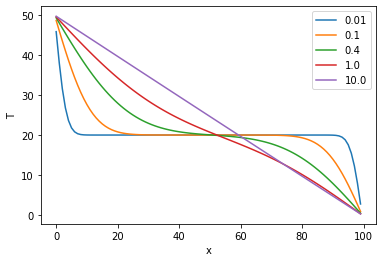

In [7]:
from numpy import empty
from matplotlib import pyplot as plt

# Constants
L = 0.01  # Thickness of steel
D = 4.25e-6  # Thermal diffusivity
N = 100  # Num of cells
h = L/N  # Grid Spacing
τ = 1e-4  # Time step
epsilon = h/1000  # Threshold

Tlow = 0.0 # Low temp of cold water
Tmid = 20.0 # Mid temp of steel
Thi = 50.0 # High temp of hot water

#Times to plot at
t1 = 0.01 
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
t_end = t5+epsilon # Time to finish

#Make arrays
T = empty(N+2,float) #N cells with 2 ghost points
T[1:-1] = Tmid
T[0] = 2*Thi-T[1]  #Ghost point to keep boundary conditions for Inside wall
T[-1] = 2*Tlow -T[-2] # Outside wall

Tp = T.copy()

t = 0.0
C = τ*D/h/h

while t<t_end:
   
    for i in range(1,N+1):
        Tp[i] = T[i] + C*(T[i+1]-2*T[i]+T[i-1])  # From equation, second part is second derivative
    
    T[0] = 2*Thi-T[1]  #Ghost point to keep boundary conditions for Inside wall
    T[-1] = 2*Tlow -T[-2] # Outside wall
    
    T, Tp = Tp,T
    t += τ #Go forward in time 
    
    if abs(t-t1) < epsilon:
        plt.plot(T[1:-1],label = t1)
    if abs(t-t2) < epsilon:
        plt.plot(T[1:-1], label = t2)
    if abs(t-t3) < epsilon:
        plt.plot(T[1:-1], label = t3)
    if abs(t-t4) < epsilon:
        plt.plot(T[1:-1], label = t4)
    if abs(t-t5) < epsilon:
        plt.plot(T[1:-1],label = t5)
        
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.show()

## Wave Equation with Standard Leapfrog

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib
N = 200  #Number of cells
L = 1
h = L/N
c = 2
τ = 0.2*h/c
C = c*c*τ*τ/h/h

x = np.linspace(-h,L+h,N+2)
y = np.empty(N+2,float)
yold = y.copy()

t = 0.0
tmax = 2
v = np.zeros_like(x)  #Initial condition of v
y = 0.01*np.exp(-(x-L/2)**2 / 0.02)  #Intial condition of y
y[0] = -y[1]  #Boundary condition will be zero
y[-1]= -y[-2]  # Boundary condition will be zero

yold[1:-1] = y[1:-1]-v[1:-1]*τ+C/2*(y[2:]-2*y[1:-1]+y[:-2])
yold[0] = -yold[1]
yold[-1] = -yold[-2]

ynew = np.zeros_like(yold)

j = 0
while t< tmax:
    ynew[1:-1] = 2*y[1:-1]-yold[1:-1] +C*(y[2:]-2*y[1:-1]+y[:-2])
    ynew[0] = -ynew[1]
    ynew[-1] = -ynew[-2]
    
    yold = np.copy(y)
    y = np.copy(ynew)
    
    if j% 50 == 0:
        plt.clf()
        plt.plot(x,y,'b-')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'time = {t:1.3f}')
        plt.ylim([-0.03,0.03])
        plt.xlim([0,L])
        plt.draw()
        plt.pause(0.1)
    j+=1
    t+= τ


Using matplotlib backend: Qt5Agg
